# Exploratory Data Analysis

In [1]:
#load the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10,5) # RuntimeConfiguration Parameters: size of graph, 10:width, 5:height
%matplotlib inline
# after plotting graph, many times depending on version of working library like matplotlib graph will not be displayed in output screen below
# For that we have to write everytime plt.show(). So if you write '%matplotlib inline' we don't need to write show() method.
import warnings # any library will give you future warnings regarding updates in functions. To ignore it write this line
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r'C:\Users\admin\Desktop\py\16 & 17 sept\data_clean1.csv') # No index column will be displayed
df

,Ozone,Solar.R,Wind,Month,Day,Year,Temp,Weather
0,41.0,190.0,7.4,5,1,2010,67,S
1,36.0,118.0,8.0,5,2,2010,72,C
2,12.0,149.0,12.6,5,3,2010,74,PS
3,18.0,313.0,11.5,5,4,2010,62,S
4,NaN,NaN,14.3,5,5,2010,56,S
...,...,...,...,...,...,...,...,...
153,41.0,190.0,7.4,5,1,2010,67,C
154,30.0,193.0,6.9,9,26,2010,70,PS
155,NaN,145.0,13.2,9,27,2010,77,S
156,14.0,191.0,14.3,9,28,2010,75,S


In [3]:
df.head(10)

,Ozone,Solar.R,Wind,Month,Day,Year,Temp,Weather
0,41.0,190.0,7.4,5,1,2010,67,S
1,36.0,118.0,8.0,5,2,2010,72,C
2,12.0,149.0,12.6,5,3,2010,74,PS
3,18.0,313.0,11.5,5,4,2010,62,S
4,NaN,NaN,14.3,5,5,2010,56,S
5,28.0,NaN,14.9,5,6,2010,66,C
6,23.0,299.0,8.6,5,7,2010,65,PS
7,19.0,99.0,13.8,5,8,2010,59,C
8,8.0,19.0,20.1,5,9,2010,61,PS
9,NaN,194.0,8.6,5,10,2010,69,S


In [4]:
df.tail(10)

,Ozone,Solar.R,Wind,Month,Day,Year,Temp,Weather
148,30.0,193.0,6.9,9,26,2010,70,C
149,NaN,145.0,13.2,9,27,2010,77,PS
150,14.0,191.0,14.3,9,28,2010,75,S
151,18.0,131.0,8.0,9,29,2010,76,PS
152,20.0,223.0,11.5,9,30,2010,68,S
153,41.0,190.0,7.4,5,1,2010,67,C
154,30.0,193.0,6.9,9,26,2010,70,PS
155,NaN,145.0,13.2,9,27,2010,77,S
156,14.0,191.0,14.3,9,28,2010,75,S
157,18.0,131.0,8.0,9,29,2010,76,C


In [5]:
df.describe()
# Positive Skewness is there in Ozone as mean is greater than median i.e.41.58>30.50 so outliers are present on upper extreme
# null values from count
# Year value is same for all values so Year column is not important here. Check variance of column. Year's std is also 0, so it's not important column
# You can check it by applying unique() function on Year column, you will get only one value 2010


,Ozone,Solar.R,Wind,Day,Year,Temp
count,120.000000,151.000000,158.000000,158.000000,158.0,158.000000
mean,41.583333,185.403974,9.957595,16.006329,2010.0,77.727848
std,32.620709,88.723103,3.511261,8.997166,0.0,9.377877
min,1.000000,7.000000,1.700000,1.000000,2010.0,56.000000
25%,18.000000,119.000000,7.400000,8.000000,2010.0,72.000000
50%,30.500000,197.000000,9.700000,16.000000,2010.0,78.500000
75%,61.500000,257.000000,11.875000,24.000000,2010.0,84.000000
max,168.000000,334.000000,20.700000,31.000000,2010.0,97.000000


In [6]:
df.describe(include=object)
# There are 8 columns but in above code we got descriptive statistics for only numeric colums
# But if you check month and weater column, month is also numeric. But may be because of a single text value data type of entire column has become object.
# in weather 3 missing values are there
# top: the value having high frequency in that column, S is used 59 times in Weather col., 9 is used 34 times in Month col.

,Month,Weather
count,158,155
unique,6,3
top,9,S
freq,34,59


In [7]:
#data types
df.dtypes # check data types of all variables
# Month column's data type is wrong

Ozone      float64
Solar.R    float64
Wind       float64
Month       object
Day          int64
Year         int64
Temp         int64
Weather     object
dtype: object

In [8]:
df.info() # find missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    120 non-null    float64
 1   Solar.R  151 non-null    float64
 2   Wind     158 non-null    float64
 3   Month    158 non-null    object 
 4   Day      158 non-null    int64  
 5   Year     158 non-null    int64  
 6   Temp     158 non-null    int64  
 7   Weather  155 non-null    object 
dtypes: float64(3), int64(3), object(2)
memory usage: 10.0+ KB


# Data type conversion

In [9]:
df['Month']

0      5
1      5
2      5
3      5
4      5
      ..
153    5
154    9
155    9
156    9
157    9
Name: Month, Length: 158, dtype: object

In [10]:
df['Month'].unique()
# May is present so data type is object. We can replace it with 5 as 5th month is May. If can't guess replace is with NaN

array(['5', 'May', '6', '7', '8', '9'], dtype=object)

In [11]:
df['Month'].value_counts()

Month
9      34
5      31
7      31
8      31
6      30
May     1
Name: count, dtype: int64

In [12]:
df['Month'].replace('May','5',inplace=True) # replacing only value not the datatype

In [13]:
df['Month'].unique()

array(['5', '6', '7', '8', '9'], dtype=object)

In [14]:
df.dtypes

Ozone      float64
Solar.R    float64
Wind       float64
Month       object
Day          int64
Year         int64
Temp         int64
Weather     object
dtype: object

In [15]:
df['Month'] = df['Month'].astype(int)

In [16]:
df['Month'].unique()

array([5, 6, 7, 8, 9])

In [17]:
df.dtypes # now Month's datatype is changed

Ozone      float64
Solar.R    float64
Wind       float64
Month        int32
Day          int64
Year         int64
Temp         int64
Weather     object
dtype: object

# **Duplicates**

In [18]:
df

,Ozone,Solar.R,Wind,Month,Day,Year,Temp,Weather
0,41.0,190.0,7.4,5,1,2010,67,S
1,36.0,118.0,8.0,5,2,2010,72,C
2,12.0,149.0,12.6,5,3,2010,74,PS
3,18.0,313.0,11.5,5,4,2010,62,S
4,NaN,NaN,14.3,5,5,2010,56,S
...,...,...,...,...,...,...,...,...
153,41.0,190.0,7.4,5,1,2010,67,C
154,30.0,193.0,6.9,9,26,2010,70,PS
155,NaN,145.0,13.2,9,27,2010,77,S
156,14.0,191.0,14.3,9,28,2010,75,S


In [19]:
df.duplicated()
# If duplicate values are there your model will not learn any new thing from it.

0      False
1      False
2      False
3      False
4      False
       ...  
153    False
154    False
155    False
156     True
157    False
Length: 158, dtype: bool

In [20]:
df.duplicated().sum() # index 156 is duplicate record of other record

1

In [21]:
# print duplicated values. keep=(first,last,false),keep=first 1st record as original and rest as duplicate
# default for keep is first. keep=false will treat all similar records as duplicate
df[df.duplicated()]

,Ozone,Solar.R,Wind,Month,Day,Year,Temp,Weather
156,14.0,191.0,14.3,9,28,2010,75,S


In [22]:
df[df.duplicated(keep = False)]

,Ozone,Solar.R,Wind,Month,Day,Year,Temp,Weather
150,14.0,191.0,14.3,9,28,2010,75,S
156,14.0,191.0,14.3,9,28,2010,75,S


In [23]:
# Drop Duplicated records

In [24]:
df.drop_duplicates(inplace=True)

In [25]:
df.shape

(157, 8)

In [26]:
df.duplicated().sum()

0

# **Drop Columns**

In [27]:
df.head()

,Ozone,Solar.R,Wind,Month,Day,Year,Temp,Weather
0,41.0,190.0,7.4,5,1,2010,67,S
1,36.0,118.0,8.0,5,2,2010,72,C
2,12.0,149.0,12.6,5,3,2010,74,PS
3,18.0,313.0,11.5,5,4,2010,62,S
4,NaN,NaN,14.3,5,5,2010,56,S


In [28]:
df.tail(10)

,Ozone,Solar.R,Wind,Month,Day,Year,Temp,Weather
147,14.0,20.0,16.6,9,25,2010,63,PS
148,30.0,193.0,6.9,9,26,2010,70,C
149,NaN,145.0,13.2,9,27,2010,77,PS
150,14.0,191.0,14.3,9,28,2010,75,S
151,18.0,131.0,8.0,9,29,2010,76,PS
152,20.0,223.0,11.5,9,30,2010,68,S
153,41.0,190.0,7.4,5,1,2010,67,C
154,30.0,193.0,6.9,9,26,2010,70,PS
155,NaN,145.0,13.2,9,27,2010,77,S
157,18.0,131.0,8.0,9,29,2010,76,C


In [29]:
df['Year'].value_counts()

Year
2010    157
Name: count, dtype: int64

In [30]:
df.drop(columns=['Year'],inplace=True)

In [31]:
df.head()

,Ozone,Solar.R,Wind,Month,Day,Temp,Weather
0,41.0,190.0,7.4,5,1,67,S
1,36.0,118.0,8.0,5,2,72,C
2,12.0,149.0,12.6,5,3,74,PS
3,18.0,313.0,11.5,5,4,62,S
4,NaN,NaN,14.3,5,5,56,S


In [32]:
# To drop multiple columns: will drop only for display purpose
df.drop(columns=['Ozone','Month'])# as inplace=True not written, changes are temporary

,Solar.R,Wind,Day,Temp,Weather
0,190.0,7.4,1,67,S
1,118.0,8.0,2,72,C
2,149.0,12.6,3,74,PS
3,313.0,11.5,4,62,S
4,NaN,14.3,5,56,S
...,...,...,...,...,...
152,223.0,11.5,30,68,S
153,190.0,7.4,1,67,C
154,193.0,6.9,26,70,PS
155,145.0,13.2,27,77,S


In [33]:
df # Ozone and Month colums are present in dataframe

,Ozone,Solar.R,Wind,Month,Day,Temp,Weather
0,41.0,190.0,7.4,5,1,67,S
1,36.0,118.0,8.0,5,2,72,C
2,12.0,149.0,12.6,5,3,74,PS
3,18.0,313.0,11.5,5,4,62,S
4,NaN,NaN,14.3,5,5,56,S
...,...,...,...,...,...,...,...
152,20.0,223.0,11.5,9,30,68,S
153,41.0,190.0,7.4,5,1,67,C
154,30.0,193.0,6.9,9,26,70,PS
155,NaN,145.0,13.2,9,27,77,S


In [34]:
# to drop a record or row
df.drop(index=[4]) # Temporary changes

,Ozone,Solar.R,Wind,Month,Day,Temp,Weather
0,41.0,190.0,7.4,5,1,67,S
1,36.0,118.0,8.0,5,2,72,C
2,12.0,149.0,12.6,5,3,74,PS
3,18.0,313.0,11.5,5,4,62,S
5,28.0,NaN,14.9,5,6,66,C
...,...,...,...,...,...,...,...
152,20.0,223.0,11.5,9,30,68,S
153,41.0,190.0,7.4,5,1,67,C
154,30.0,193.0,6.9,9,26,70,PS
155,NaN,145.0,13.2,9,27,77,S


In [35]:
# drop multiple rows
df.drop(index=[1,3])

,Ozone,Solar.R,Wind,Month,Day,Temp,Weather
0,41.0,190.0,7.4,5,1,67,S
2,12.0,149.0,12.6,5,3,74,PS
4,NaN,NaN,14.3,5,5,56,S
5,28.0,NaN,14.9,5,6,66,C
6,23.0,299.0,8.6,5,7,65,PS
...,...,...,...,...,...,...,...
152,20.0,223.0,11.5,9,30,68,S
153,41.0,190.0,7.4,5,1,67,C
154,30.0,193.0,6.9,9,26,70,PS
155,NaN,145.0,13.2,9,27,77,S


In [36]:
df

,Ozone,Solar.R,Wind,Month,Day,Temp,Weather
0,41.0,190.0,7.4,5,1,67,S
1,36.0,118.0,8.0,5,2,72,C
2,12.0,149.0,12.6,5,3,74,PS
3,18.0,313.0,11.5,5,4,62,S
4,NaN,NaN,14.3,5,5,56,S
...,...,...,...,...,...,...,...
152,20.0,223.0,11.5,9,30,68,S
153,41.0,190.0,7.4,5,1,67,C
154,30.0,193.0,6.9,9,26,70,PS
155,NaN,145.0,13.2,9,27,77,S


# **Rename the Column**

In [37]:
df.head()

,Ozone,Solar.R,Wind,Month,Day,Temp,Weather
0,41.0,190.0,7.4,5,1,67,S
1,36.0,118.0,8.0,5,2,72,C
2,12.0,149.0,12.6,5,3,74,PS
3,18.0,313.0,11.5,5,4,62,S
4,NaN,NaN,14.3,5,5,56,S


In [38]:
#rename the Solar column, Pass parameter in dictionary form
df.rename(columns={'Solar.R': 'Solar','Temp':'Temperature'}, inplace=True)

In [39]:
df

,Ozone,Solar,Wind,Month,Day,Temperature,Weather
0,41.0,190.0,7.4,5,1,67,S
1,36.0,118.0,8.0,5,2,72,C
2,12.0,149.0,12.6,5,3,74,PS
3,18.0,313.0,11.5,5,4,62,S
4,NaN,NaN,14.3,5,5,56,S
...,...,...,...,...,...,...,...
152,20.0,223.0,11.5,9,30,68,S
153,41.0,190.0,7.4,5,1,67,C
154,30.0,193.0,6.9,9,26,70,PS
155,NaN,145.0,13.2,9,27,77,S


# **Missing Value Imputation**
Reasons of missing values:
*   Data entry errors
*   Issues with machines
*   Improper data handling, etc.
## **Treatment**
*   0 to 5 % missing values in a column: drop rows
*   6 to 45 % missing values in a column: replace the missing values
* 50% missing values in a column: drop column





In [40]:
df.head()

,Ozone,Solar,Wind,Month,Day,Temperature,Weather
0,41.0,190.0,7.4,5,1,67,S
1,36.0,118.0,8.0,5,2,72,C
2,12.0,149.0,12.6,5,3,74,PS
3,18.0,313.0,11.5,5,4,62,S
4,NaN,NaN,14.3,5,5,56,S


In [41]:
df.isna() # or isnull(), True: missing value

,Ozone,Solar,Wind,Month,Day,Temperature,Weather
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,True,True,False,False,False,False,False
...,...,...,...,...,...,...,...
152,False,False,False,False,False,False,False
153,False,False,False,False,False,False,False
154,False,False,False,False,False,False,False
155,True,False,False,False,False,False,False


In [42]:
df.isna().sum()

Ozone          38
Solar           7
Wind            0
Month           0
Day             0
Temperature     0
Weather         3
dtype: int64

In [43]:
df.isnull().sum()

Ozone          38
Solar           7
Wind            0
Month           0
Day             0
Temperature     0
Weather         3
dtype: int64

<Axes: >

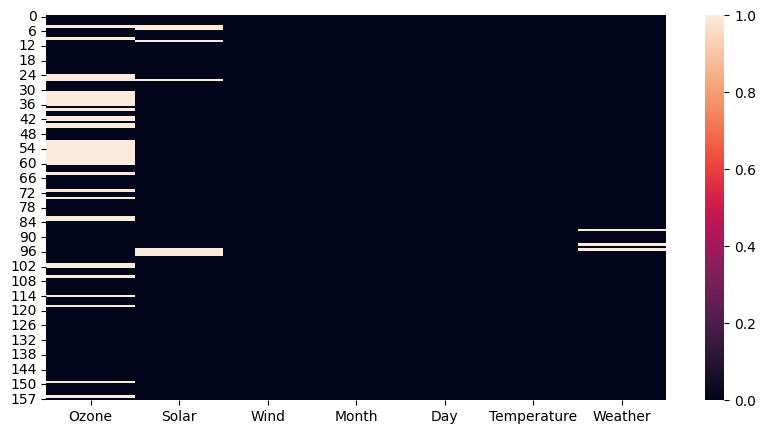

In [44]:
# visualize missing values
sns.heatmap(df.isna()) # white horizontal lines are missing values

In [45]:
df.isna().sum()

Ozone          38
Solar           7
Wind            0
Month           0
Day             0
Temperature     0
Weather         3
dtype: int64

In [46]:
len(df)

157

In [47]:
# % of missing values
for i in df.isna().sum():
  print((i/len(df))*100)
# Ozone: replace missing values as missing values are in the range of 6 to 45%
# Solar, Weather: drop missing values
# but we will treat missing values
# Ozone and Solar are numeric columns. If outliers are present in that column, replace missing values with median,
# if no outliers in column replace missing value with mean
# if categorical column replace missing value with mode.

# 0 to 5 % missing values: drop rows
# 6 to 45 %: replace the missing values
# 50%: drop column

24.203821656050955
4.45859872611465
0.0
0.0
0.0
0.0
1.910828025477707


In [48]:
df.head()

,Ozone,Solar,Wind,Month,Day,Temperature,Weather
0,41.0,190.0,7.4,5,1,67,S
1,36.0,118.0,8.0,5,2,72,C
2,12.0,149.0,12.6,5,3,74,PS
3,18.0,313.0,11.5,5,4,62,S
4,NaN,NaN,14.3,5,5,56,S


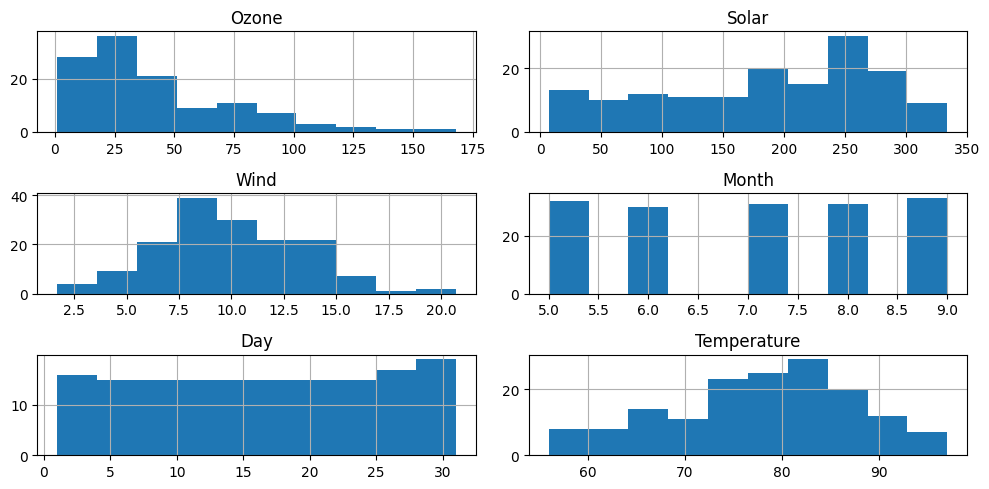

In [49]:
df.hist()
plt.tight_layout() # avoid overlapping of labels of graphs
# Skewness: Less than -1 or greater than +1 high skewness, Ozone
# -0.5 to +0.5: Moderate skewness, Solar
# 0: Normal

<Axes: >

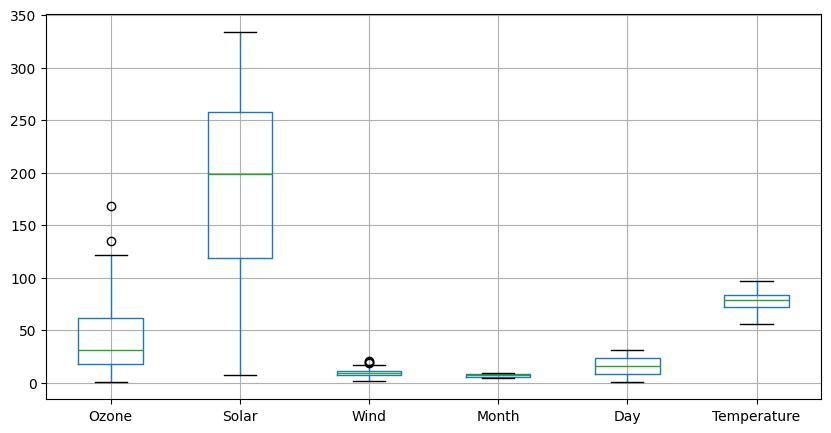

In [50]:
df.boxplot()
# Ozone: outliers are present so replace missing values with median
# In Solar: No outliers so replace missing values with mean

<Axes: xlabel='Ozone'>

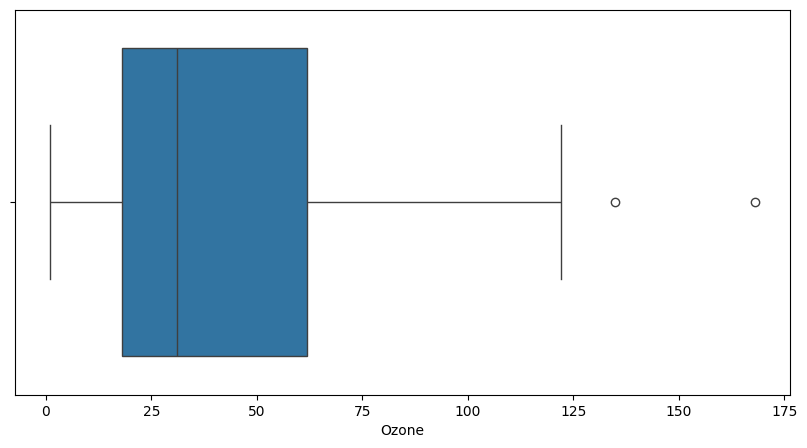

In [51]:
sns.boxplot(x = df['Ozone']) # for vertical boxplot: sns.boxplot(y = df['Wind'])

In [52]:
ozone_median = df['Ozone'].median()
ozone_median

31.0

In [53]:
df['Ozone'].fillna(ozone_median,inplace=True)

In [54]:
df.isna().sum()

Ozone          0
Solar          7
Wind           0
Month          0
Day            0
Temperature    0
Weather        3
dtype: int64

In [55]:
df['Solar'].mean()

185.36666666666667

In [56]:
df['Solar'].fillna(df['Solar'].mean(),inplace=True)

In [57]:
df.isna().sum()

Ozone          0
Solar          0
Wind           0
Month          0
Day            0
Temperature    0
Weather        3
dtype: int64

In [58]:
df['Weather'].value_counts()

Weather
S     58
C     49
PS    47
Name: count, dtype: int64

In [59]:
df['Weather'].mode()

0    S
Name: Weather, dtype: object

In [60]:
df['Weather'].mode()[0] # for multimodal values select index 0 mode

'S'

In [61]:
df['Weather'].fillna(df['Weather'].mode()[0],inplace=True)

In [62]:
df.isna().sum()

Ozone          0
Solar          0
Wind           0
Month          0
Day            0
Temperature    0
Weather        0
dtype: int64

In [63]:
df['Weather'].value_counts()

Weather
S     61
C     49
PS    47
Name: count, dtype: int64

# **Outlier Detection**
*   Histogram
*   Boxplot
*   Descriptive Statistics
*   Bar Plot - for Categorical columns






In [64]:
df.describe()
# getting idea that Ozone and Wind columns have outliers as huge gap in between 75% and max value

,Ozone,Solar,Wind,Month,Day,Temperature
count,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000
mean,39.197452,185.366667,9.929936,7.019108,15.929936,77.745223
std,28.781992,86.998999,3.505188,1.434338,8.974404,9.405334
min,1.000000,7.000000,1.700000,5.000000,1.000000,56.000000
25%,21.000000,127.000000,7.400000,6.000000,8.000000,72.000000
50%,31.000000,193.000000,9.700000,7.000000,16.000000,79.000000
75%,45.000000,255.000000,11.500000,8.000000,24.000000,84.000000
max,168.000000,334.000000,20.700000,9.000000,31.000000,97.000000


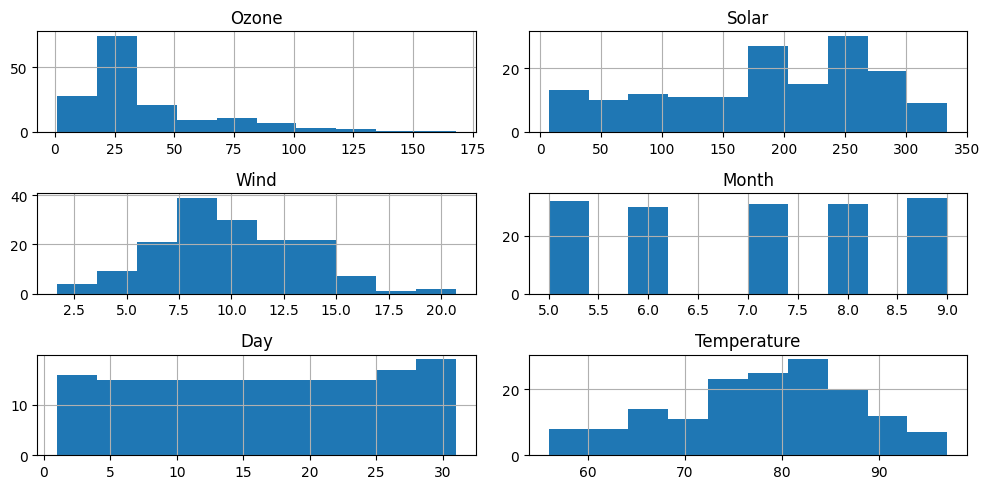

In [65]:
df.hist()
plt.tight_layout()
# same outlier information is visible here. Confirm with boxplot

<Axes: >

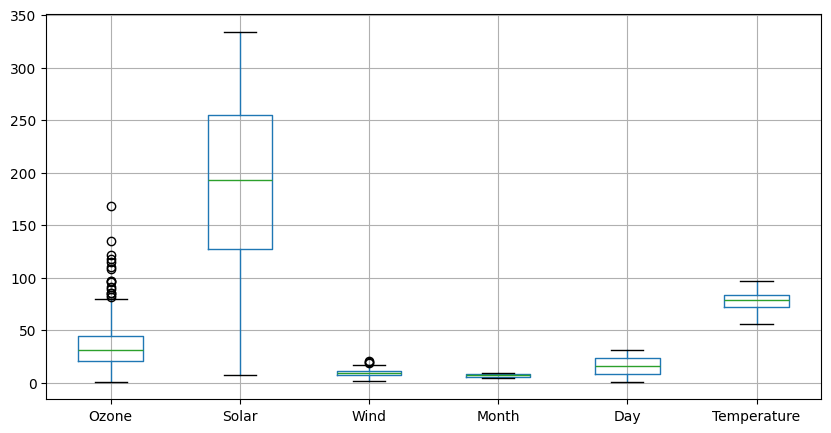

In [66]:
df.boxplot()

<Axes: xlabel='Ozone'>

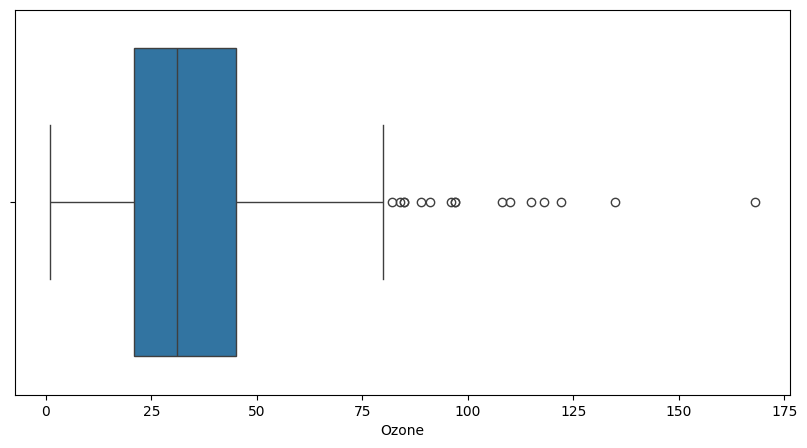

In [67]:
sns.boxplot(x = df['Ozone'])

# **Outlier Treatment**

*   Capping: Replacing outlier values is called capping
*   In Capping all outlier values will be replaced by upper extreme



In [68]:
def UserFunction():
  print("Hello")
  print("Function Introduction")
  print("Hi")

In [69]:
UserFunction()

Hello
Function Introduction
Hi


In [70]:
UserFunction(10)

TypeError: UserFunction() takes 0 positional arguments but 1 was given

In [71]:
len()

TypeError: len() takes exactly one argument (0 given)

In [72]:
len(df)

157

In [73]:
len("Snehal")

6

In [74]:
def add(num1,num2):
  print(num1 + num2)

In [75]:
add()

TypeError: add() missing 2 required positional arguments: 'num1' and 'num2'

In [76]:
add(10,120)

130


In [77]:
def arithmatic(num1,num2):
  print("Addition:",num1 + num2)
  print("Subtraction:",num1 - num2)
  print("Multiplication:",num1 * num2)
  print("Division:",num1 / num2)

In [78]:
arithmatic(40,4)

Addition: 44
Subtraction: 36
Multiplication: 160
Division: 10.0


In [79]:
"Data" + "Science"

'DataScience'

In [80]:
"Data" + " " + "Science"

'Data Science'

In [81]:
def addText(text1,text2):
  print(text1 + " " + text2)

In [82]:
addText("String","Concatenation")

String Concatenation


In [83]:
"Snehal" + "Shinde"

'SnehalShinde'

In [84]:
addText("Snehal","Shinde")

Snehal Shinde


In [85]:
df['Ozone'].quantile(0.25) # lower quartile: q1

21.0

In [86]:
df['Ozone'].quantile(0.75) # upper quartile: q3

45.0

In [87]:
# Outlier Detection: User defined Function to calculate Upper Extreme and Lower Extreme value
def outlier_detection(data,colname):
  q1 = data[colname].quantile(0.25)
  q3 = data[colname].quantile(0.75)
  iqr = q3 - q1

  upper_extreme = q3 + (1.5 * iqr)
  lower_extreme = q1 - (1.5 * iqr)

  return lower_extreme, upper_extreme,q1,q3

In [88]:
outlier_detection(df,'Ozone')

(-15.0, 81.0, 21.0, 45.0)

In [89]:
outlier_detection(df,'Wind') # try for 'Solar' or other columns

(1.2500000000000009, 17.65, 7.4, 11.5)

In [90]:
# extract all values of Ozone column which are greater than upper extreme i.e 81
df[df['Ozone']>81.0]

,Ozone,Solar,Wind,Month,Day,Temperature,Weather
29,115.0,223.0,5.7,5,30,79,C
61,135.0,269.0,4.1,7,1,84,S
68,97.0,267.0,6.3,7,8,92,PS
69,97.0,272.0,5.7,7,9,92,C
70,85.0,175.0,7.4,7,10,89,PS
85,108.0,223.0,8.0,7,25,85,PS
88,82.0,213.0,7.4,7,28,88,S
98,122.0,255.0,4.0,8,7,89,C
99,89.0,229.0,10.3,8,8,90,PS
100,110.0,207.0,8.0,8,9,90,C


In [91]:
df[df['Ozone']>81.0].shape[0]

16

In [92]:
# OR
len(df[df['Ozone']>81.0])

16

In [93]:
# Now all these 16 outlier values of Ozone column should be replaced by upper extreme
df.loc[df['Ozone']>81.0,'Ozone']

29     115.0
61     135.0
68      97.0
69      97.0
70      85.0
85     108.0
88      82.0
98     122.0
99      89.0
100    110.0
116    168.0
120    118.0
121     84.0
122     85.0
123     96.0
126     91.0
Name: Ozone, dtype: float64

In [94]:
# Capping Outliers of Ozone column
df.loc[df['Ozone']>81.0,'Ozone'] = 81.0

In [95]:
df[df['Ozone'] > 81.0]
# No values are displayed.. as all outliers are replaced by 81.0

,Ozone,Solar,Wind,Month,Day,Temperature,Weather


In [96]:
df[df['Ozone'] == 81.0]
# confirm index values for which outliere are replaced - 21,61,68....
# check index in output of command lines 109 or 113

,Ozone,Solar,Wind,Month,Day,Temperature,Weather
29,81.0,223.0,5.7,5,30,79,C
61,81.0,269.0,4.1,7,1,84,S
68,81.0,267.0,6.3,7,8,92,PS
69,81.0,272.0,5.7,7,9,92,C
70,81.0,175.0,7.4,7,10,89,PS
85,81.0,223.0,8.0,7,25,85,PS
88,81.0,213.0,7.4,7,28,88,S
98,81.0,255.0,4.0,8,7,89,C
99,81.0,229.0,10.3,8,8,90,PS
100,81.0,207.0,8.0,8,9,90,C


In [97]:
# Do it for 'Wind' column also
outlier_detection(df,'Wind')

(1.2500000000000009, 17.65, 7.4, 11.5)

<Axes: xlabel='Wind'>

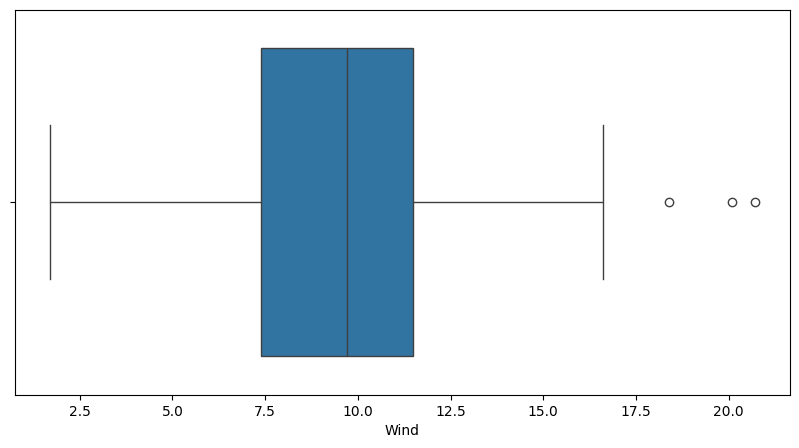

In [98]:
sns.boxplot(x = df['Wind'])

In [99]:
# Upper extreme value for Wind column is 17.65 so replace all values of Wind column which are greater than 17.65
df[df['Wind'] > 17.65]

,Ozone,Solar,Wind,Month,Day,Temperature,Weather
8,8.0,19.0,20.1,5,9,61,PS
17,6.0,78.0,18.4,5,18,57,C
47,37.0,284.0,20.7,6,17,72,C


In [100]:
# Capping Outliers of Wind column
df.loc[df['Wind']>17.65,'Wind'] = 17.65

<Axes: >

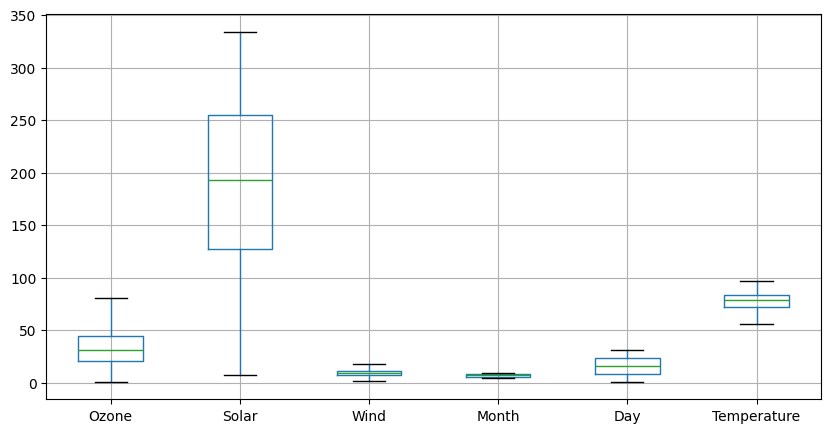

In [101]:
df.boxplot()
# Now there are no outliers in any column

In [102]:
df.shape

(157, 7)

# **Scatter Plot and Correlation**

In [103]:
df.head()

,Ozone,Solar,Wind,Month,Day,Temperature,Weather
0,41.0,190.000000,7.4,5,1,67,S
1,36.0,118.000000,8.0,5,2,72,C
2,12.0,149.000000,12.6,5,3,74,PS
3,18.0,313.000000,11.5,5,4,62,S
4,31.0,185.366667,14.3,5,5,56,S


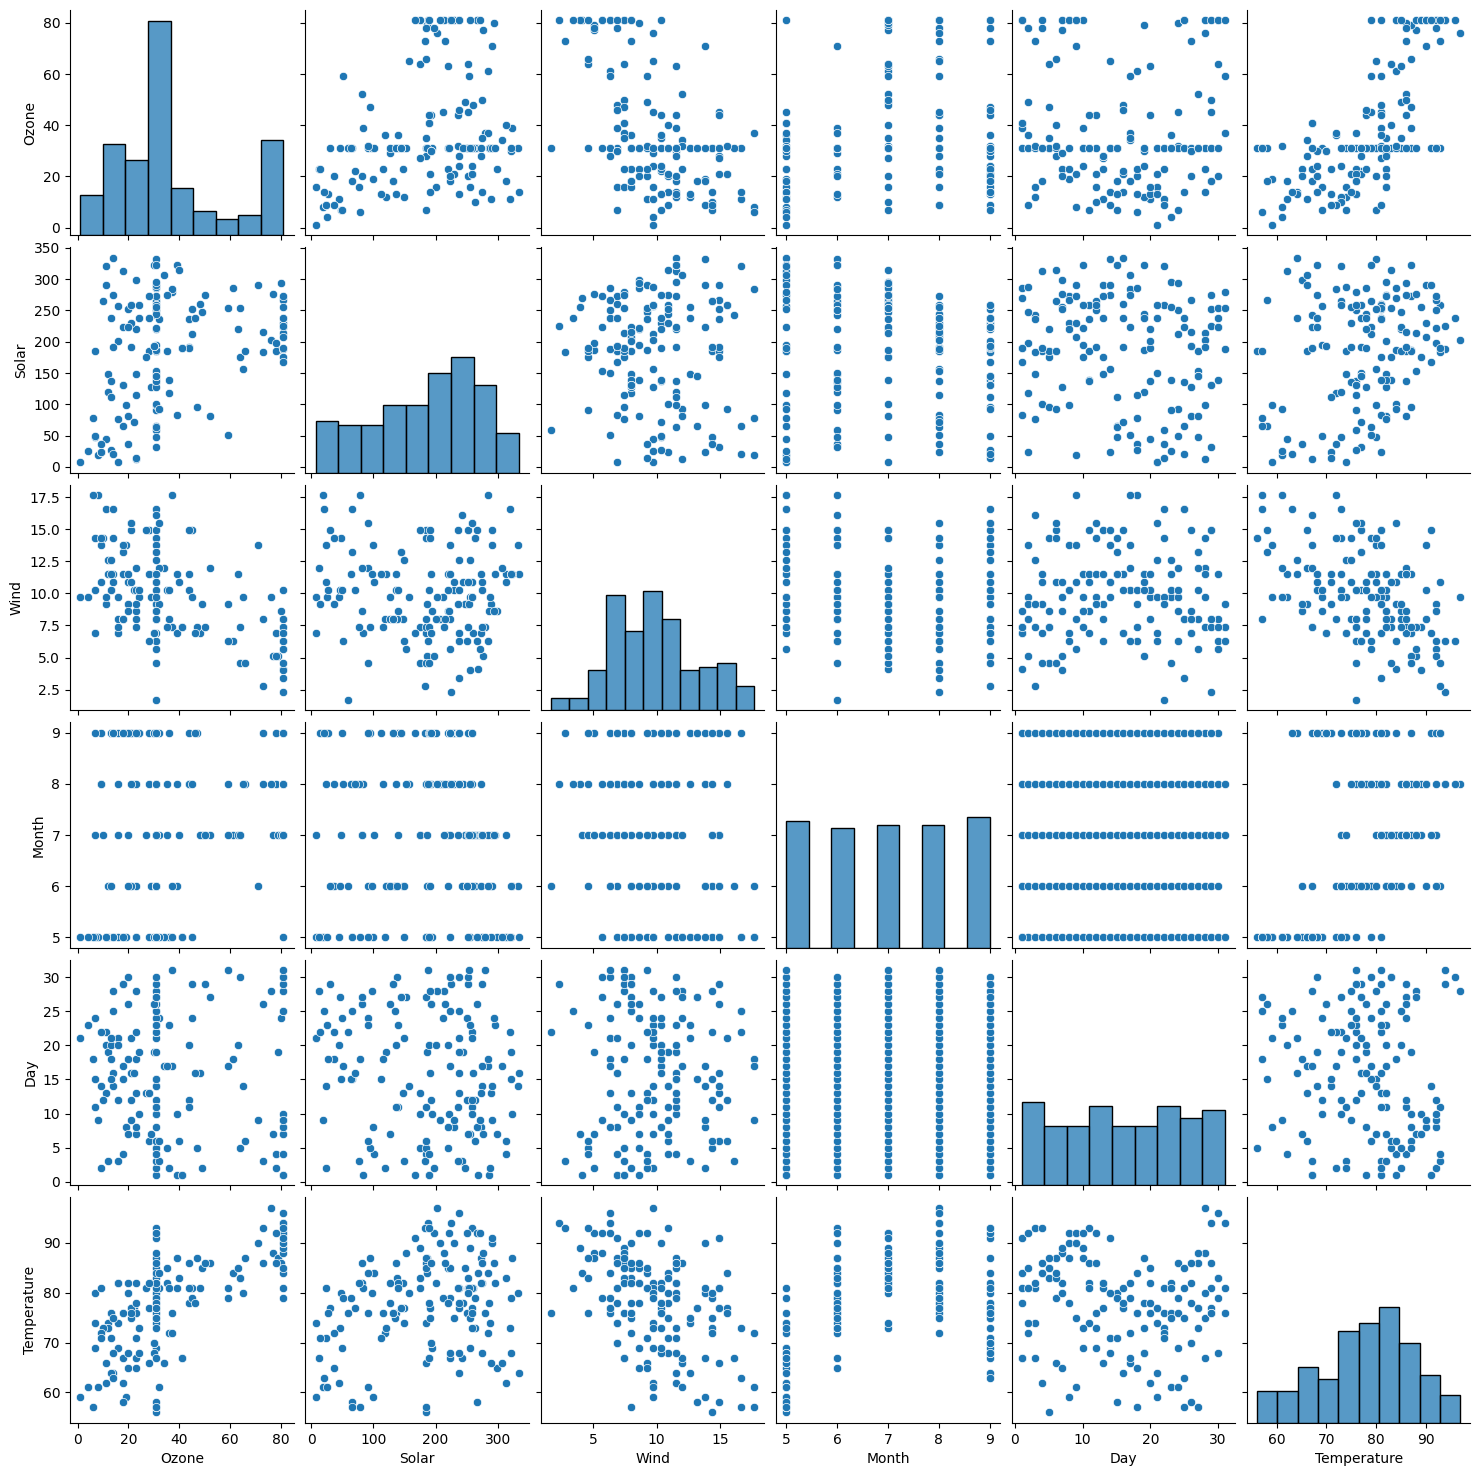

In [104]:
sns.pairplot(df) # relationship between all nemerical columns
# check graph of month(x axis) vs Temperature(y axis)
# We got 5 vertical lines in it because datatype of Month is Discrete numerical value. It has only 5 unique discrete numerical values.
# It shows no relationship between month and temperature

In [105]:
# Correlation Coefficient
df.corr(numeric_only=True)
# Ozone vs Ozone corr is 1.0 so ignore diagonal values
# Ozone vs Temperature corr is 0.66 i.e. positive moderate correlation
# For large no. of columns go for heatmap visualization

,Ozone,Solar,Wind,Month,Day,Temperature
Ozone,1.000000,0.317926,-0.522513,0.183089,-0.042835,0.662773
Solar,0.317926,1.000000,-0.053534,-0.080237,-0.151007,0.260677
Wind,-0.522513,-0.053534,1.000000,-0.162988,0.033374,-0.439939
Month,0.183089,-0.080237,-0.162988,1.000000,0.041438,0.408060
Day,-0.042835,-0.151007,0.033374,0.041438,1.000000,-0.122787
Temperature,0.662773,0.260677,-0.439939,0.408060,-0.122787,1.000000


<Axes: >

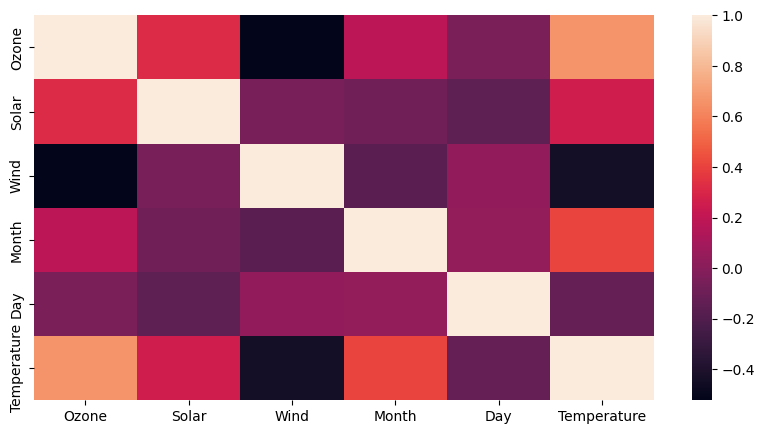

In [106]:
sns.heatmap(df.corr(numeric_only=True))
# See sidebar which shows -1 to +1 values from bottom to top
# On the side vertical bar Light color indicates positive strong relationship.
# Dark black color indicates strong negative relationship
# For clear understanging pass parameters to heatmap()

<Axes: >

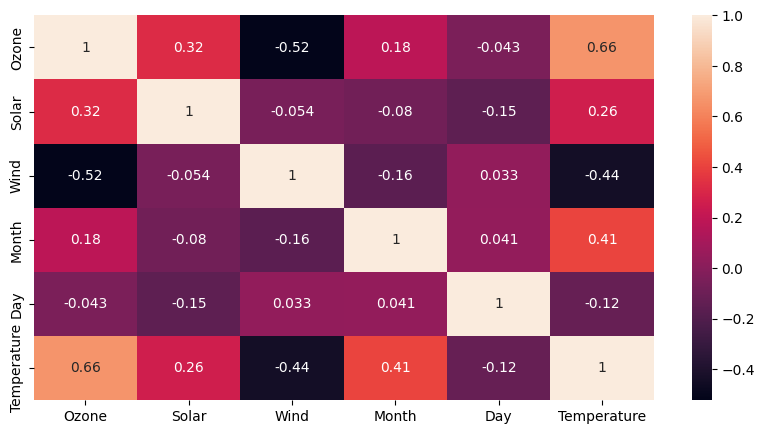

In [107]:
sns.heatmap(df.corr(numeric_only=True),annot=True)
# colors are representing correlation value also

<Axes: >

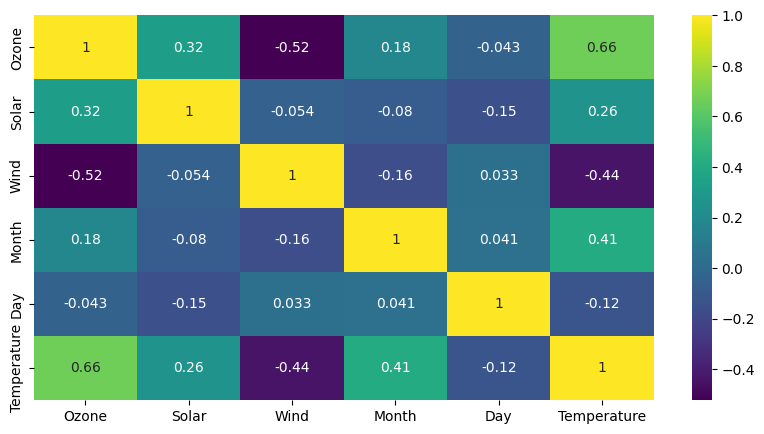

In [108]:
# we can change color combination also
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='viridis')

<Axes: >

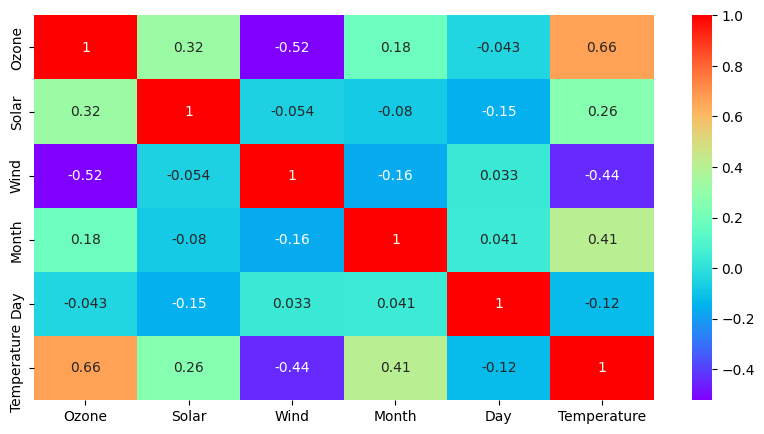

In [109]:
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='rainbow') # cmap='crest'

# **Transformations**


*   Convert Text data to numeric before model building



In [110]:
df.head()

,Ozone,Solar,Wind,Month,Day,Temperature,Weather
0,41.0,190.000000,7.4,5,1,67,S
1,36.0,118.000000,8.0,5,2,72,C
2,12.0,149.000000,12.6,5,3,74,PS
3,18.0,313.000000,11.5,5,4,62,S
4,31.0,185.366667,14.3,5,5,56,S


In [111]:
# Encoding using Pandas dummy function
df = pd.get_dummies(data = df, columns = ['Weather'])

In [112]:
df

,Ozone,Solar,Wind,Month,Day,Temperature,Weather_C,Weather_PS,Weather_S
0,41.0,190.000000,7.4,5,1,67,False,False,True
1,36.0,118.000000,8.0,5,2,72,True,False,False
2,12.0,149.000000,12.6,5,3,74,False,True,False
3,18.0,313.000000,11.5,5,4,62,False,False,True
4,31.0,185.366667,14.3,5,5,56,False,False,True
...,...,...,...,...,...,...,...,...,...
152,20.0,223.000000,11.5,9,30,68,False,False,True
153,41.0,190.000000,7.4,5,1,67,True,False,False
154,30.0,193.000000,6.9,9,26,70,False,True,False
155,31.0,145.000000,13.2,9,27,77,False,False,True


# **Filling special symbols (which are not identified with isnull()) with NaN**

In [113]:
import pandas as pd
import numpy as np

# Sample dataset with "?" as missing values
data = {
    'Name': ['Amit', 'Neha', 'Chirag', '?'],
    'Age': [25, '?', 30, 28],
    'Score': [88, 92, '?', 95]
}

df = pd.DataFrame(data)
print("Original DataFrame:")
df

Original DataFrame:


,Name,Age,Score
0,Amit,25,88
1,Neha,?,92
2,Chirag,30,?
3,?,28,95


In [114]:
df.isnull().sum()

Name     0
Age      0
Score    0
dtype: int64

In [115]:
df['Score'].value_counts()

Score
88    1
92    1
?     1
95    1
Name: count, dtype: int64

In [116]:
df.replace("?", np.nan, inplace=True)
# if we want to replace multiple symbols at a time
# df.replace(["?", "#", "N/A"], np.nan, inplace=True)

In [117]:
df

,Name,Age,Score
0,Amit,25.0,88.0
1,Neha,NaN,92.0
2,Chirag,30.0,NaN
3,NaN,28.0,95.0


In [118]:
df.isnull().sum()

Name     1
Age      1
Score    1
dtype: int64

In [119]:
# Now you can impute missing values
df

,Name,Age,Score
0,Amit,25.0,88.0
1,Neha,NaN,92.0
2,Chirag,30.0,NaN
3,NaN,28.0,95.0
